In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [28]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')
# Changing all N/A Variables to work nice in graphing, for actual data process change value to 0

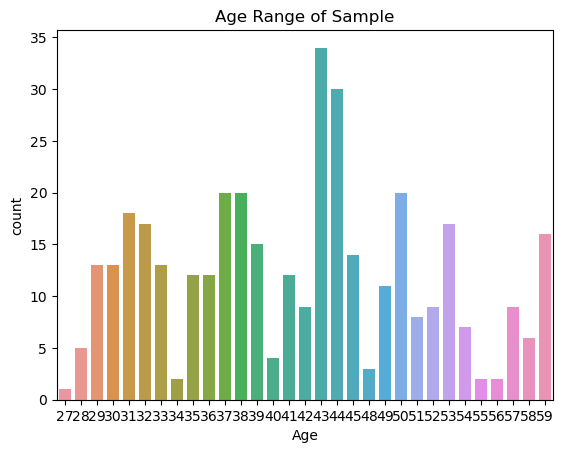

In [29]:
sns_plot = sns.countplot(x='Age', data=df)
fig = sns_plot.get_figure()
plt.title('Age Range of Sample')
plt.show()
fig.savefig('Images/graph1_countplot')
## Not sure how to get the xticks to be more distanced or less frequent to make more legible

As we can see theres a rather diverse selection of age groups ranging 27 to 59, with the average being 43 (The Mean score is 42.19 and Median is 43)

## 1. Distribution of Sleep Duration
We look for how the sleep duration is distributed across multiple different variables to see what relationships we can find

c:\Users\baile\anaconda3\anacondo\envs\3.10pyv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


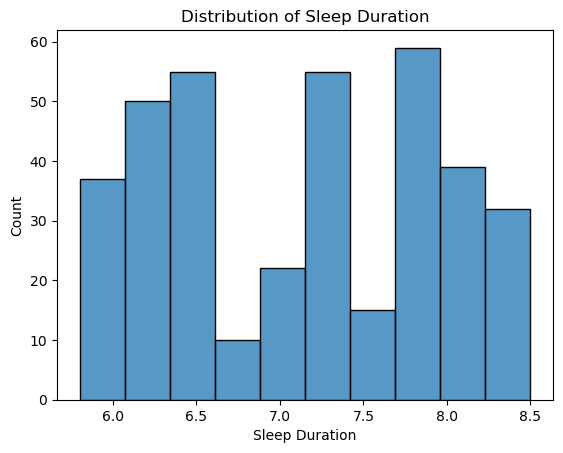

In [30]:
sns_plot = sns.histplot(data=df, x="Sleep Duration")
fig = sns_plot.get_figure()
plt.title('Distribution of Sleep Duration')
plt.show()
fig.savefig('Images/graph1_histogram')

 <!-- Maybe do a stacked one to check how many in each group classify as having a sleep disorder ## -->
The average healthy sleeping range in adults is 7 or more hours. Using this histogram we can identify a large number of individuals below the 7-hour mark but with more overall falling in the healthy sleep range. 

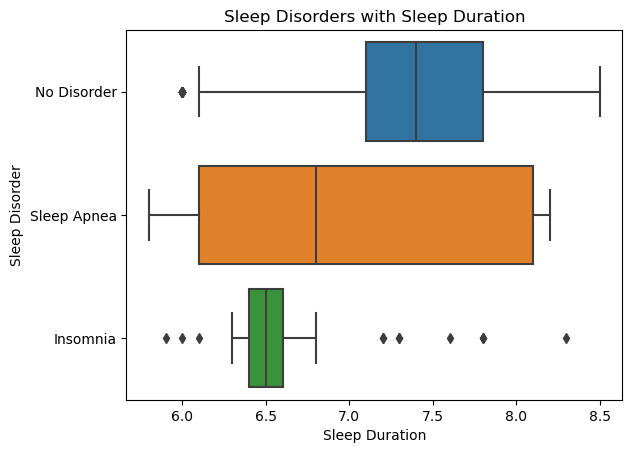

In [31]:
sns_plot = sns.boxplot(data=df, x='Sleep Duration', y='Sleep Disorder')
fig = sns_plot.get_figure()
plt.title('Sleep Disorders with Sleep Duration')
plt.show()
fig.savefig('Images/graph1_box.png')

From this graph we can see that sleep apnea covers a wider range of sleep duration, Insomnia has a lot more outlier-variables but with the majority falling underneath the healthy amount, and those with no disorder having the highest average sleeping duration. This shows our data has very few outlier variables within it regarding sleeping and disorders as these results were to be expected.

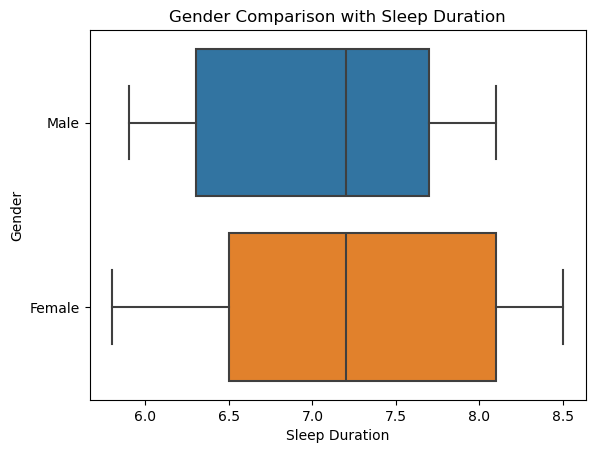

In [32]:
sns_plot = sns.boxplot(data=df, x='Sleep Duration', y='Gender')
fig = sns_plot.get_figure()
plt.title('Gender Comparison with Sleep Duration')
plt.show()
fig.savefig('Images/graph1_box_gender.png')

We can also see in this box-plot that the average sleep duration is the same across both genders with Females having more of a varied amount compared to men, with more of the female vales being above 7 hours than male. This could be due to males having more sleeping disorders than females.

## 2. Correlation between Sleep Duration and Sleep Quality
Find any correlations between Sleep Duration and Quality of Sleep, as well as finding any other variables that relate to one another.

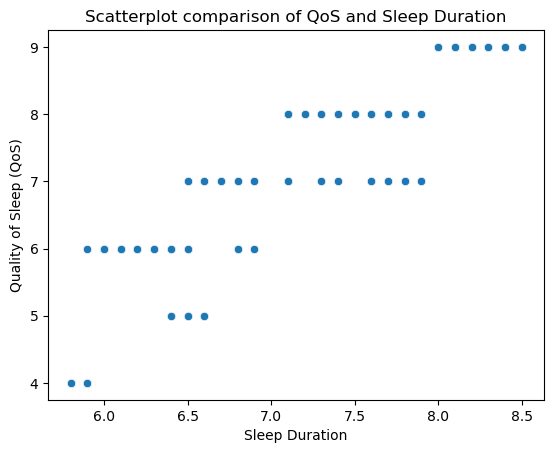

In [33]:
sns_plot = sns.scatterplot(data=df, x="Sleep Duration", y="Quality of Sleep")
fig = sns_plot.get_figure()
plt.title('Scatterplot comparison of QoS and Sleep Duration')
plt.ylabel('Quality of Sleep (QoS)')
plt.show()
fig.savefig('Images/graph2_scatter.png')

As we can see above, The Sleep Duration and Quality of Sleep have a very high correlational value as was hypothesised. Next we should test a heatmap to see what other variables have a high relation to one another.

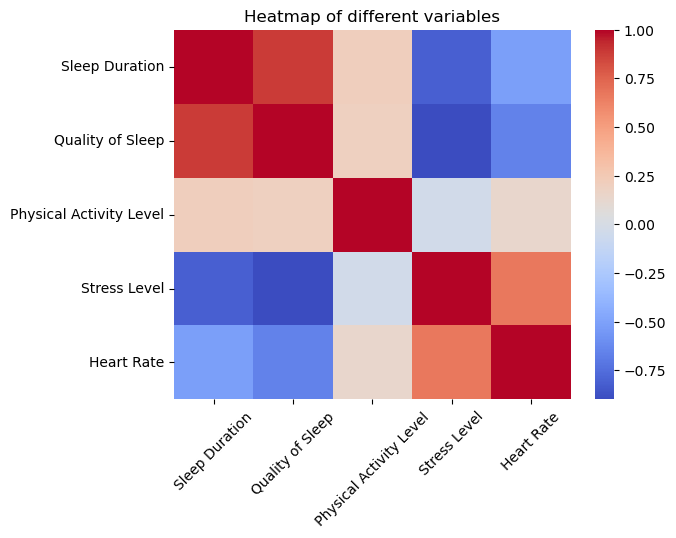

In [34]:
correlation_matrix = df[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']].corr()

sns_plot = sns.heatmap(correlation_matrix, cmap='coolwarm')
fig = sns_plot.get_figure()
plt.title('Heatmap of different variables')
plt.xticks(rotation=45)
plt.show()
fig.savefig('Images/graph2_heatmap.png')

Reading this heatmap: It appears that Sleep Duration and Quality of Sleep are very closely related, as seen in prior graph, while understandably Sleep Duration and Quality of sleep are low compared to Stress Levels, meaning Higher stress == Less sleep duration and Quality of sleep.\
\
Physical activity during the day doesnt seem to correlate with anything meaning thats a variable that shouldnt affect the outcome of our dataset.

## 3. Impact of Stress Level on Sleep Quality
Compare and visualise average sleep quality across different levels of Stress Level.

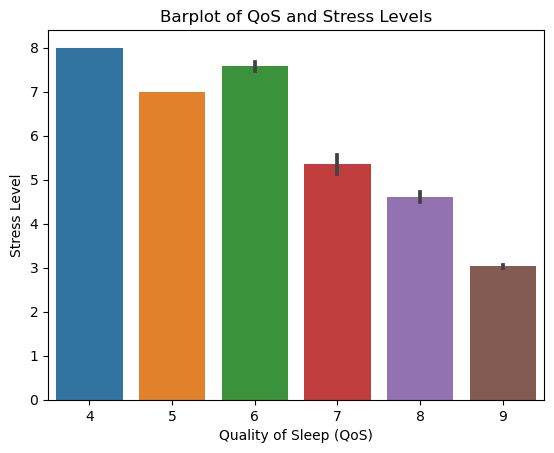

In [35]:
sns_plot = sns.barplot(data=df, x='Quality of Sleep', y="Stress Level")
fig = sns_plot.get_figure()
plt.title('Barplot of QoS and Stress Levels')
plt.xlabel('Quality of Sleep (QoS)')
plt.show()
fig.savefig('Images/graph3_barplot.png')

Come back to this one, not entirely sure what the candle wicks mean in this case. Main thing to note is when quality of sleep is lower the stress level is higher compared to the inverse

## 4. BMI Category and Sleep Disorders
Show the proportion of individuals with and without sleep disorders across different BMI Categories.

In [36]:
print(df['BMI Category'].value_counts())
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')
df['BMI Category'] = df['BMI Category'].replace('Obese', 'Overweight')
print('=====================')
print(df['BMI Category'].value_counts())

# Data Cleaning step above, was 21 values of "Normal Weight", which is same as Normal
# There was also only 10 identifing as Obese rather than Overweight so data was combined on that too

proportion_df = df.groupby(['BMI Category', 'Sleep Disorder']).size().unstack()
proportion_df = proportion_df.div(proportion_df.sum(axis=1), axis=0)


BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
BMI Category
Normal        216
Overweight    158
Name: count, dtype: int64


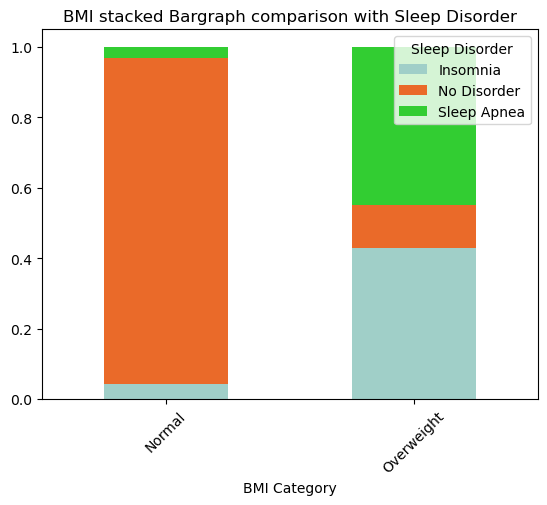

In [37]:
sns_plot = proportion_df.plot(kind='bar', stacked=True, color=['#a0cfc8', '#ea6a29', 'limegreen'])
fig = sns_plot.get_figure()
plt.title('BMI stacked Bargraph comparison with Sleep Disorder')
plt.xticks(rotation=45)
plt.show()
fig.savefig('Images/graph4_stackedbar.png')

We can see in the above graph that the 'Normal' weight which total at 216 different entries, are considerable less subjected to sleeping conditions compared to the 'Overweight' values. 

Side Note: They look like little Oompa Loompas :D (Completely unintentionally too)

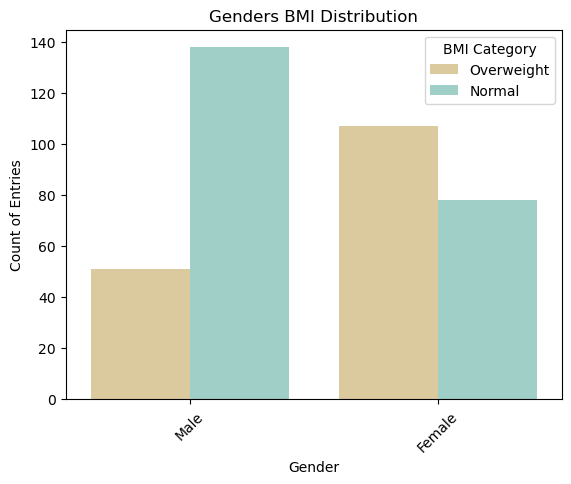

In [38]:
sns_plot = sns.countplot(x='Gender', hue='BMI Category', data=df, palette='BrBG')
fig = sns_plot.get_figure()
plt.ylabel("Count of Entries")
plt.xticks(rotation=45)
plt.title("Genders BMI Distribution")
plt.show()
fig.savefig('Images/graph4_countplot.png')

It also appears that the difference between male and females when it came to putting Overweight was significantly different and based on the graph prior we can assume this can lead to biased data regarding genders and Sleep Disorders.

## 5. Daily Steps vs Sleep Quality
Track how Daily Steps relate to Quality of Sleep.

c:\Users\baile\anaconda3\anacondo\envs\3.10pyv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\baile\anaconda3\anacondo\envs\3.10pyv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


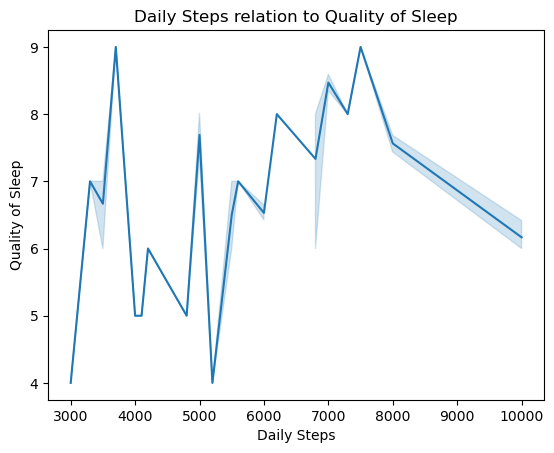

In [39]:
sns_plot = sns.lineplot(data=df, x='Daily Steps', y='Quality of Sleep')
fig = sns_plot.get_figure()
plt.title("Daily Steps relation to Quality of Sleep")
plt.show()
fig.savefig('Images/graph5_line.png')

No real correlation, maybe something with <6000 being more likely to have low sleep quality. Personally this feels similar to Physical Excertion column where its irrelevant

## 6. Gender and Sleep Disorders
Comparing the number of individuals with and without sleep disorders across different genders.

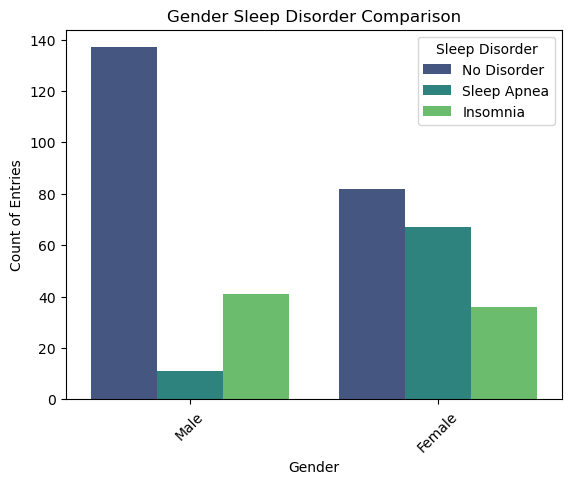

In [40]:
sns_plot = sns.countplot(x='Gender', hue='Sleep Disorder', data=df, palette='viridis')
fig = sns_plot.get_figure()
plt.ylabel("Count of Entries")
plt.title("Gender Sleep Disorder Comparison")
plt.xticks(rotation=45)
plt.show()
fig.savefig('Images/graph6_countplot.png')

The amount of Females with sleeping disorders compared to males could be due to the female values being more likely to be overweight, though its still intriguing to see that males have a higher level of insomniacs that females.

## 7. Occupation and Sleep Duration
Comparing sleep duration across different occupations to identify which occupations might have the most sleep issues.

In [41]:
values = df['Occupation'].value_counts()

# Note that Manager, Sales Representative, Scientist and Software Engineer all are below 30, so we shall remove them to clean this data

occupations_to_drop = ['Sales Representative', 'Manager', 'Scientist', 'Software Engineer']
df_cleaned = df[~df['Occupation'].isin(occupations_to_drop)].reset_index(drop=True)

print(values)
print('====================================')
print(df_cleaned['Occupation'].value_counts())

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
Occupation
Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Name: count, dtype: int64


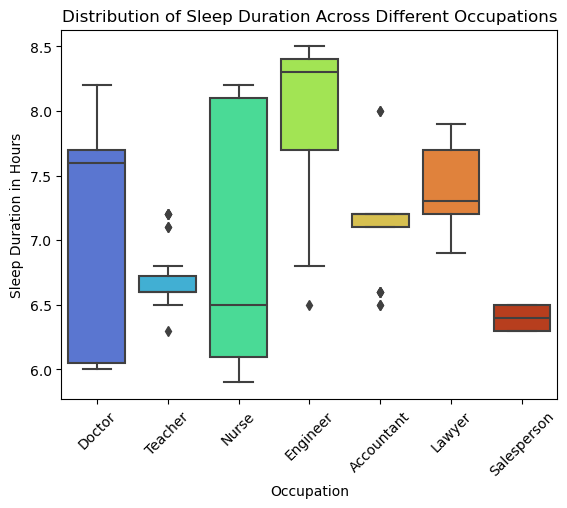

In [42]:
sns_plot = sns.boxplot(x='Occupation', y='Sleep Duration', data=df_cleaned, palette='turbo')
fig = sns_plot.get_figure()
plt.xticks(rotation=45)
plt.ylabel('Sleep Duration in Hours')
plt.title('Distribution of Sleep Duration Across Different Occupations')
plt.show()
fig.savefig('Images/graph7_box.png')